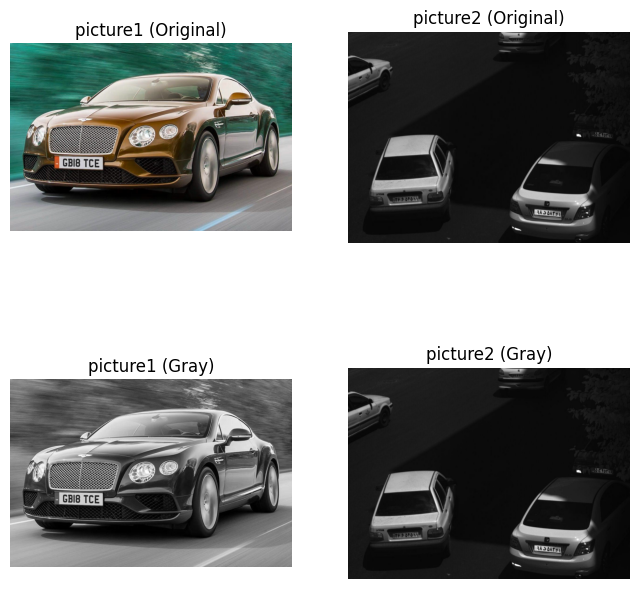

True

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

pic1 = cv2.imread("1.jpg")
pic2 = cv2.imread("2.jpg")

pic1_gray = cv2.cvtColor(pic1, cv2.COLOR_BGR2GRAY)
pic2_gray = cv2.cvtColor(pic2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1), plt.imshow(pic1), plt.title('picture1 (Original)'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(pic2), plt.title('picture2 (Original)'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(pic1_gray, cmap='gray'), plt.title('picture1 (Gray)'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(pic2_gray, cmap='gray'), plt.title('picture2 (Gray)'), plt.axis('off')
plt.show()

path = "grayImages"
if not os.path.exists(path):
    os.mkdir(path)
cv2.imwrite(path + "/pic1_gray.jpg", pic1_gray)
cv2.imwrite(path + "/pic2_gray.jpg", pic2_gray)


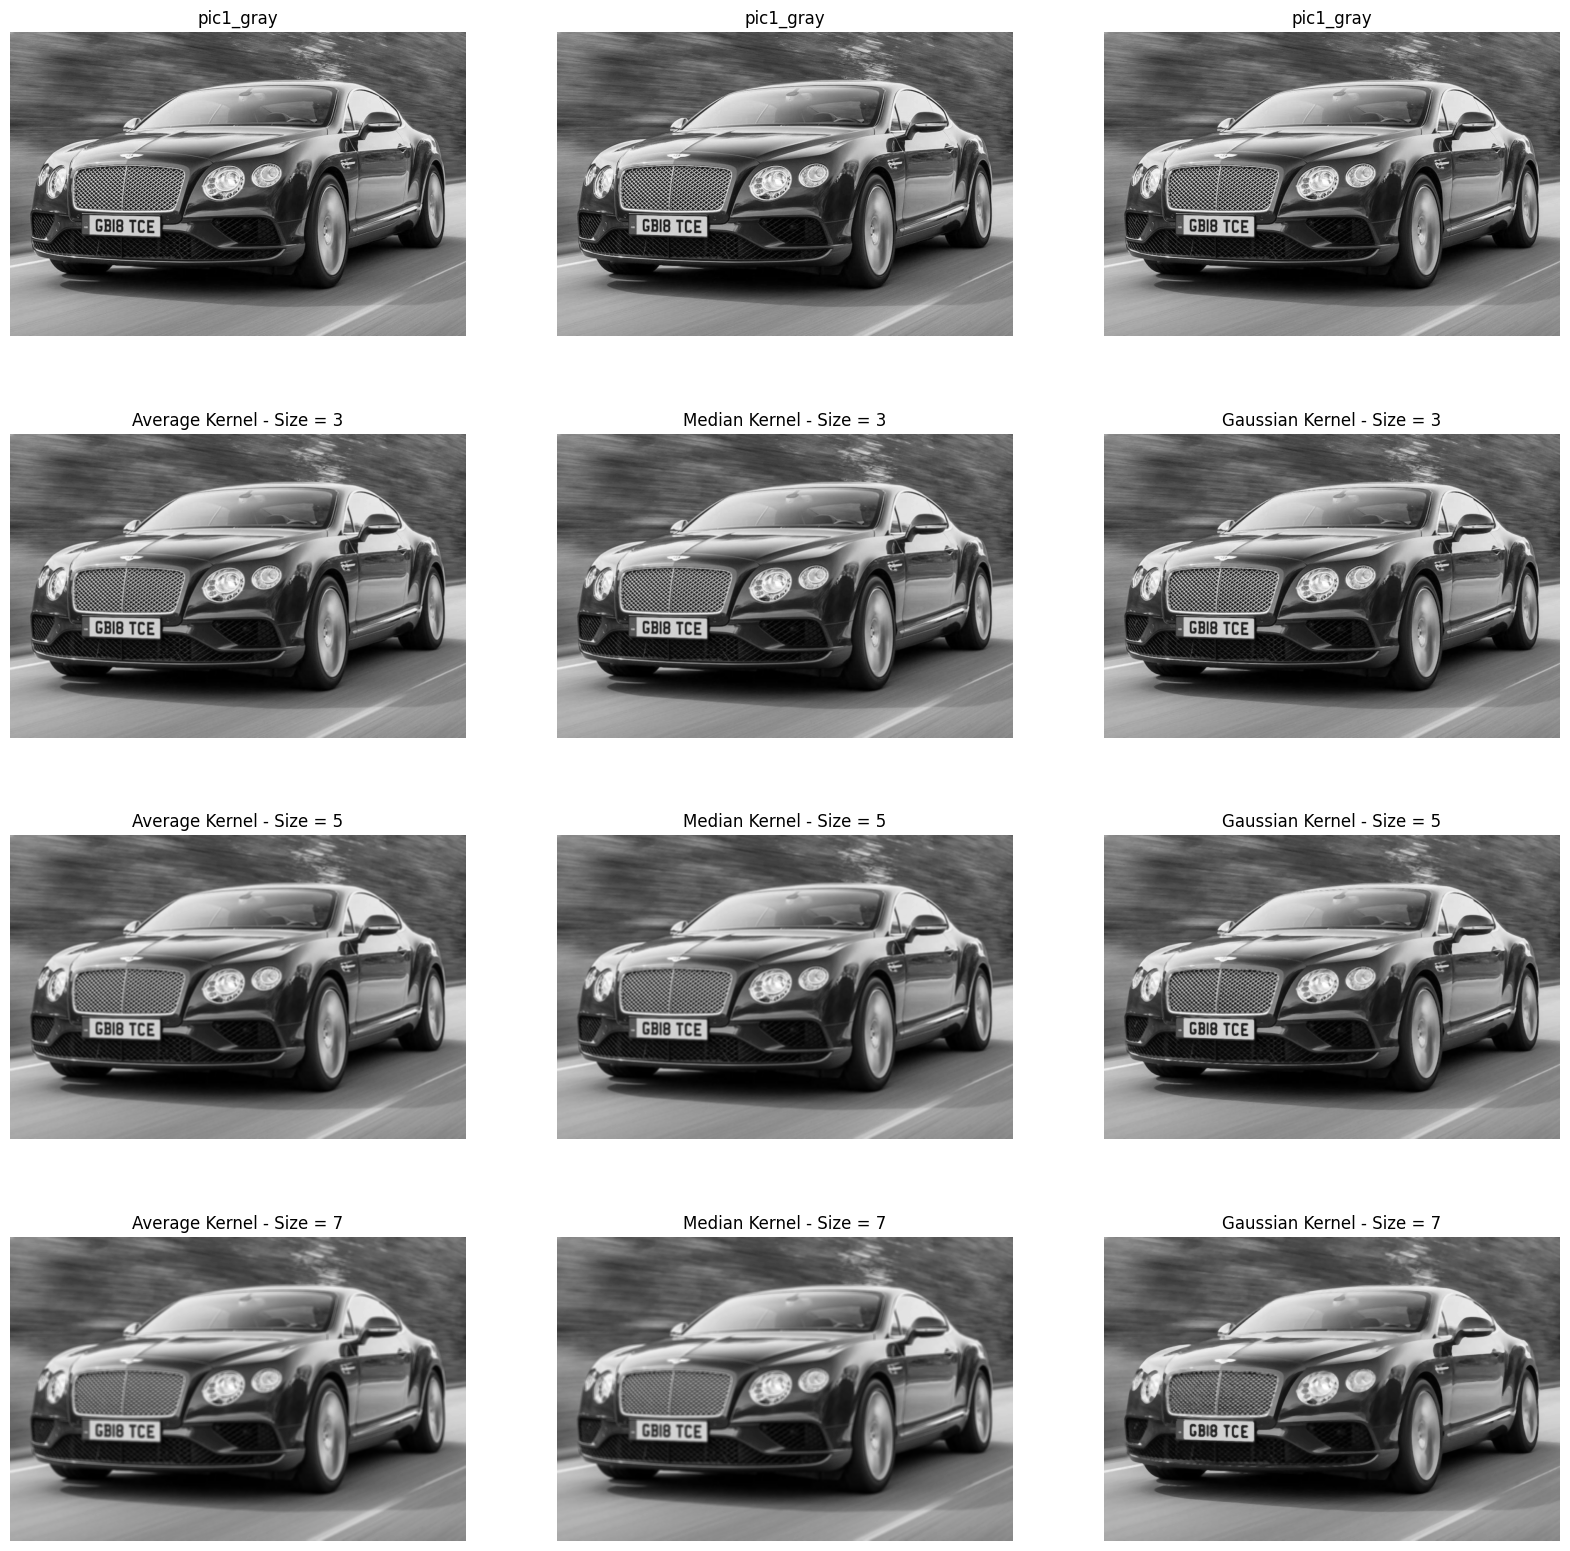

In [3]:
path = "SmoothKernel"
if not os.path.exists(path):
    os.mkdir(path)

plt.figure(figsize=(20, 20))
plt.subplot(4, 3, 1), plt.imshow(
    pic1_gray, cmap='gray'), plt.title('pic1_gray'), plt.axis('off')
plt.subplot(4, 3, 2), plt.imshow(
    pic1_gray, cmap='gray'), plt.title('pic1_gray'), plt.axis('off')
plt.subplot(4, 3, 3), plt.imshow(
    pic1_gray, cmap='gray'), plt.title('pic1_gray'), plt.axis('off')

for idx, kernel_size in enumerate([3, 5, 7]):

    pic1_average = cv2.blur(pic1_gray, (kernel_size, kernel_size))
    pic1_gaussian = cv2.GaussianBlur(pic1_gray, (kernel_size, kernel_size), 10)
    pic1_median = cv2.medianBlur(pic1_gray, kernel_size)

    plt.subplot(4, 3, (idx+1)*3+1), plt.imshow(pic1_average,  cmap='gray'), plt.title(f'Average Kernel - Size = {kernel_size}'), plt.axis('off')
    plt.subplot(4, 3, (idx+1)*3+2), plt.imshow(pic1_gaussian, cmap='gray'), plt.title(f'Median Kernel - Size = {kernel_size}'), plt.axis('off')
    plt.subplot(4, 3, (idx+1)*3+3), plt.imshow(pic1_median,   cmap='gray'), plt.title(f'Gaussian Kernel - Size = {kernel_size}'), plt.axis('off')

    cv2.imwrite(path + f"/pic1_gray_avg_{kernel_size}.jpg", pic1_average)
    cv2.imwrite(path + f"/pic1_gray_gau_{kernel_size}.jpg", pic1_gaussian)
    cv2.imwrite(path + f"/pic1_gray_med_{kernel_size}.jpg", pic1_median)


واضح است که فیلتر (کرنل) های میانگین گیر و گوسی، به علت اینکه به نوعی تجمیع اثر پیکسل های نزدیک به هم (به اندازه سایز کرنل) را در درون خروجی اعمال اثر میدهند، منجر به مات شدن تصویر خروجی میشوند. بدیهی است که هرچه سایز کرنل افزایش پیدا کند این مات شدن به علت اینکه اثر و ترکیب تعداد بیشتری پیکسل است، محو تر و مات تر میشود که در تصاویر فوق نیز پیداست. 

در مقابل، فیلتر (کرنل) میانه گیر، چون میانه پیکسل های موجود در ماتریس کرنل را به عنوان خروجی انتخاب میکند و در واقع مقدار جدیدی تولید نمیکند، به نوعی حالت خاصی از نویز های تصویر را حذف میکند که در این تصویر در قسمت جلوی کاپوت ماشین واضح است. بخشی که حفره ها و پنجره های ریز دارد.

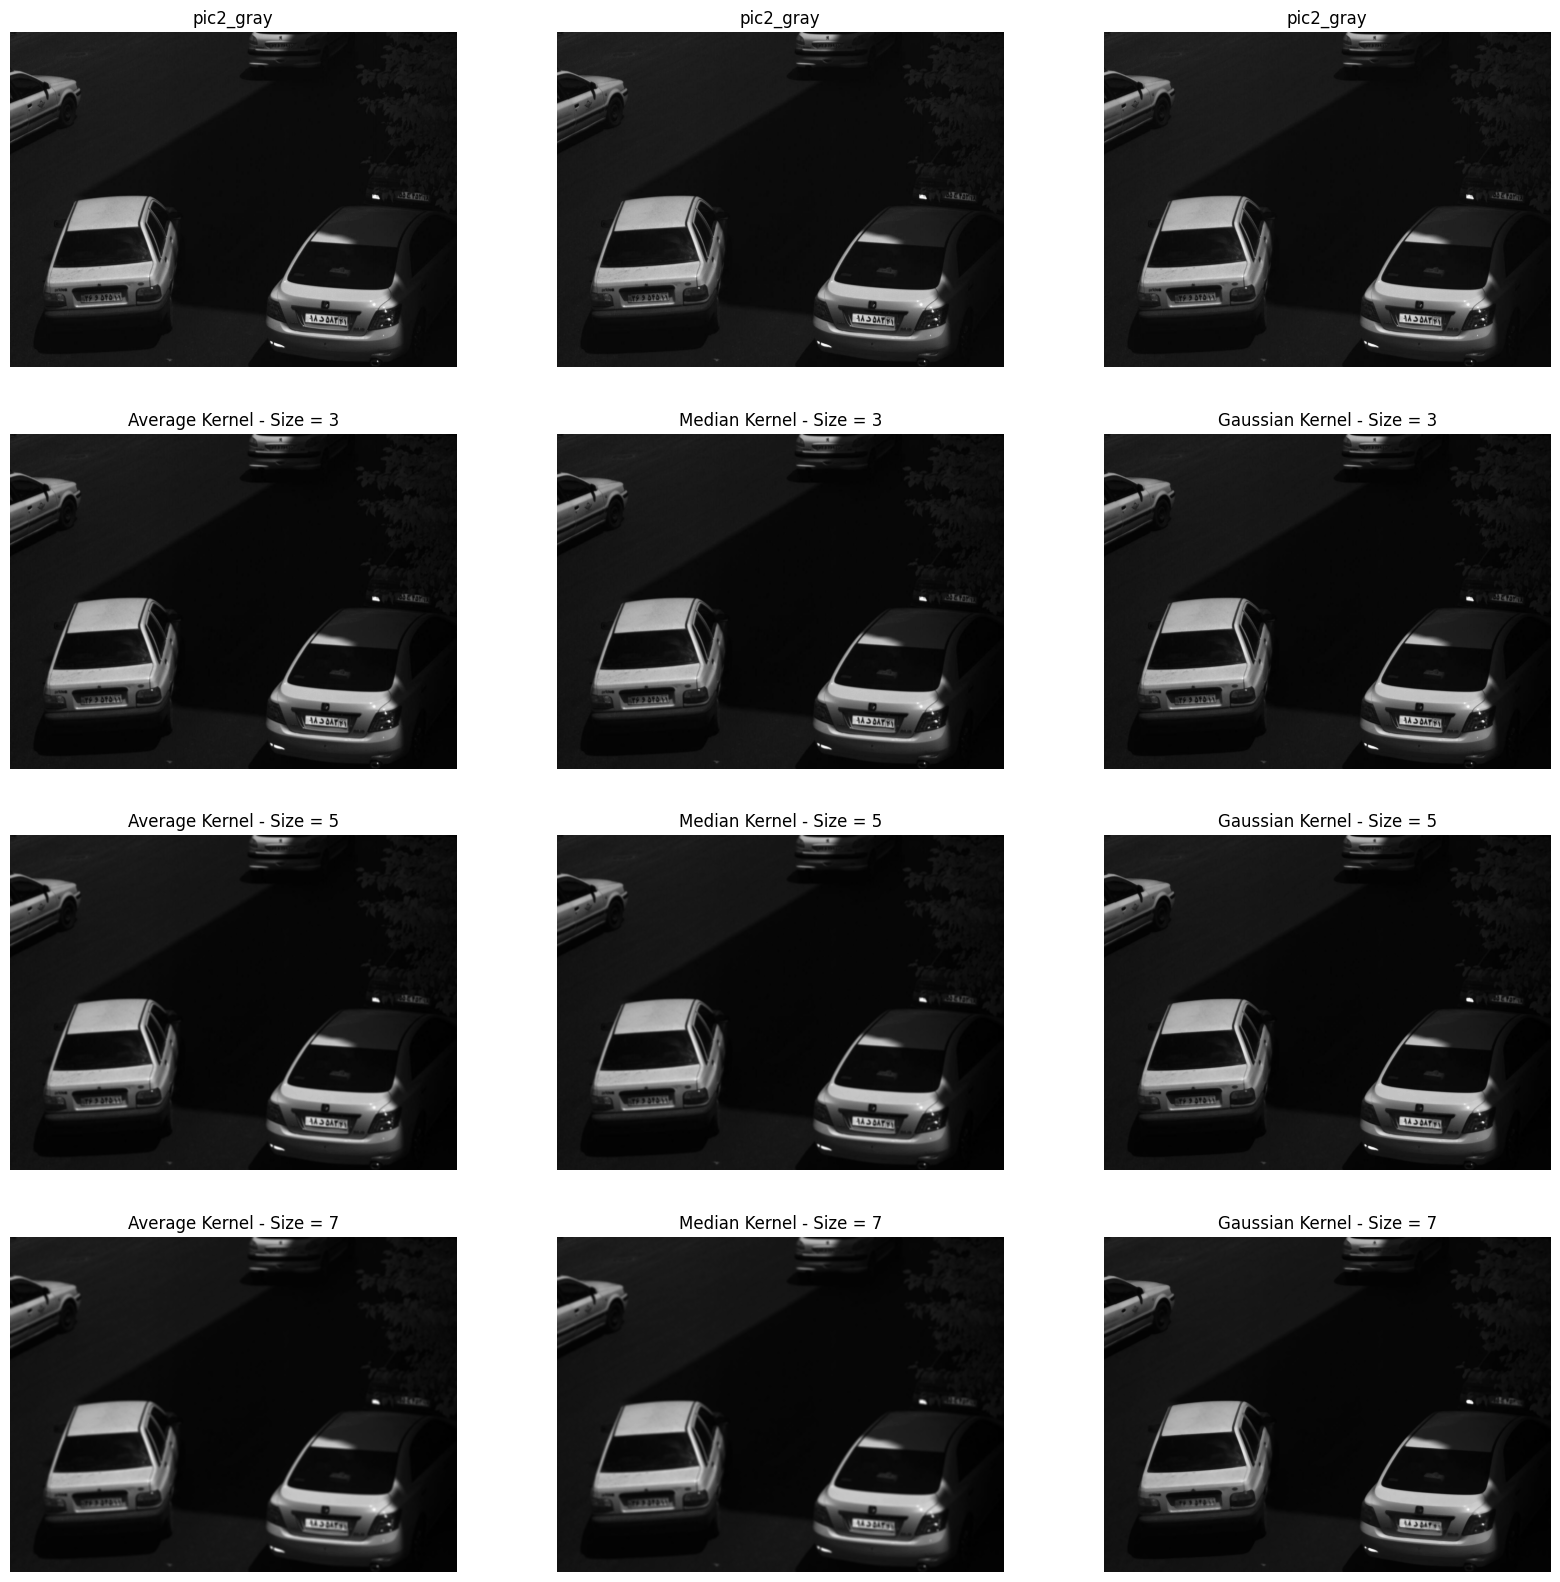

In [4]:
path = "SmoothKernel"
if not os.path.exists(path):
    os.mkdir(path)

plt.figure(figsize=(20, 20))
plt.subplot(4, 3, 1), plt.imshow(pic2_gray, cmap='gray'), plt.title('pic2_gray'), plt.axis('off')
plt.subplot(4, 3, 2), plt.imshow(pic2_gray, cmap='gray'), plt.title('pic2_gray'), plt.axis('off')
plt.subplot(4, 3, 3), plt.imshow(pic2_gray, cmap='gray'), plt.title('pic2_gray'), plt.axis('off')

for idx, kernel_size in enumerate([3, 5, 7]):

    pic1_average = cv2.blur(pic2_gray, (kernel_size, kernel_size))
    pic1_gaussian = cv2.GaussianBlur(pic2_gray, (kernel_size, kernel_size), 10)
    pic1_median = cv2.medianBlur(pic2_gray, kernel_size)

    plt.subplot(4, 3, (idx+1)*3+1), plt.imshow(pic1_average,  cmap='gray'), plt.title(f'Average Kernel - Size = {kernel_size}'), plt.axis('off')
    plt.subplot(4, 3, (idx+1)*3+2), plt.imshow(pic1_gaussian, cmap='gray'), plt.title(f'Median Kernel - Size = {kernel_size}'), plt.axis('off')
    plt.subplot(4, 3, (idx+1)*3+3), plt.imshow(pic1_median,   cmap='gray'), plt.title(f'Gaussian Kernel - Size = {kernel_size}'), plt.axis('off')

    cv2.imwrite(path + f"/pic2_gray_avg_{kernel_size}.jpg", pic1_average)
    cv2.imwrite(path + f"/pic2_gray_gau_{kernel_size}.jpg", pic1_gaussian)
    cv2.imwrite(path + f"/pic2_gray_med_{kernel_size}.jpg", pic1_median)


True

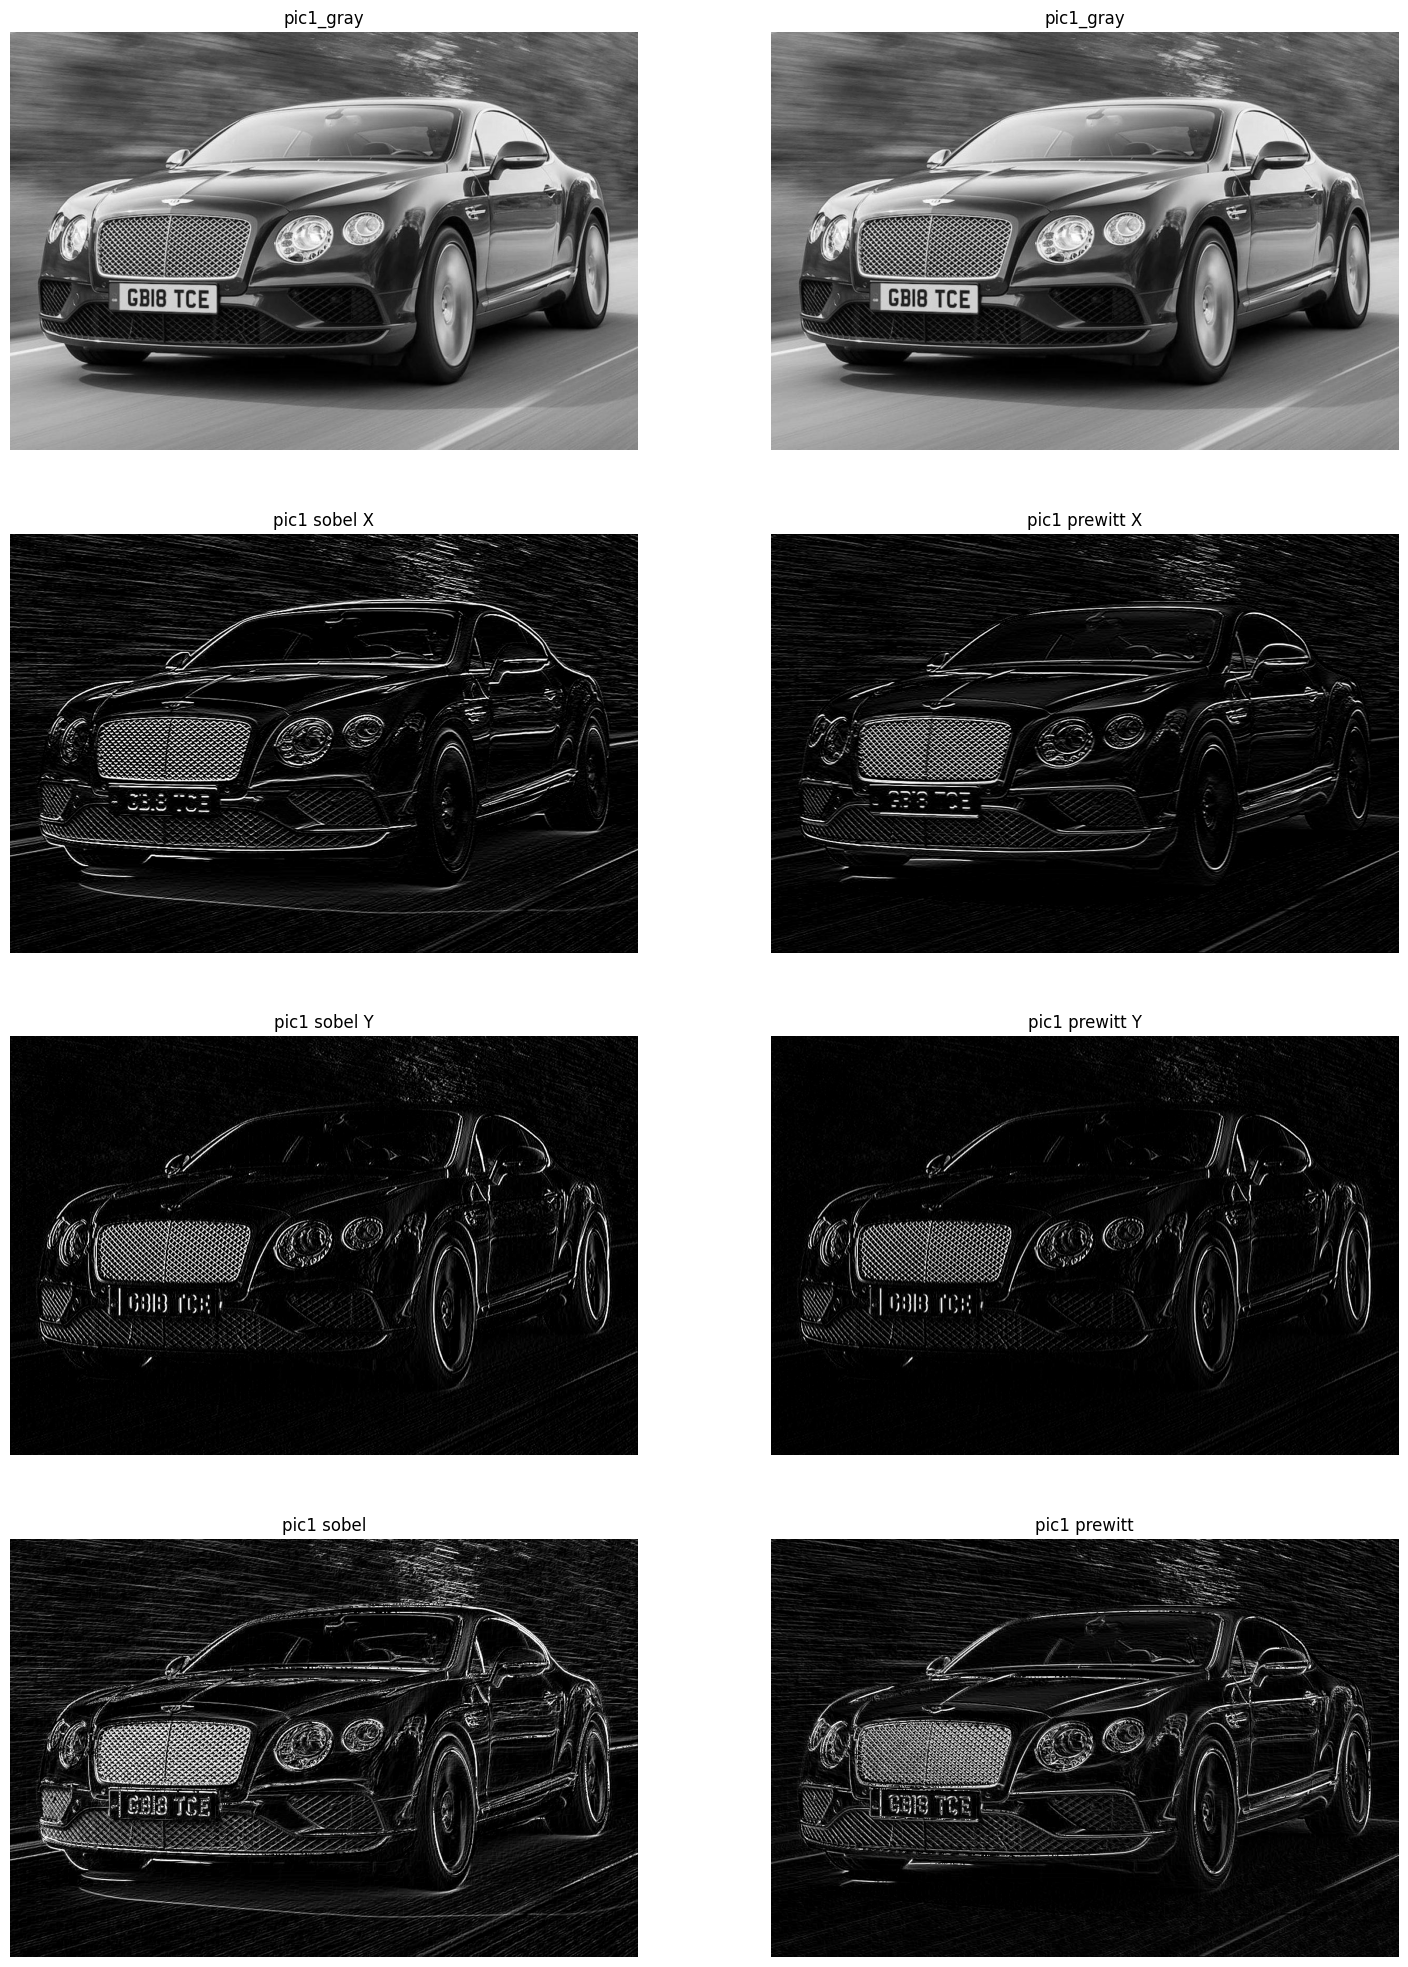

In [5]:

Sobel_Kernel_y = np.array(
                    [[-1, -2, -1],
                     [ 0,  0,  0],
                     [ 1,  2,  1]]
                    )
Sobel_Kernel_x = np.array(
                    [[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]]
                    )
pic1_gray_sobelX = cv2.filter2D(pic1_gray, -1, Sobel_Kernel_y)
pic1_gray_sobelY = cv2.filter2D(pic1_gray, -1, Sobel_Kernel_x)
pic1_gray_sobel = pic1_gray_sobelX + pic1_gray_sobelY


Prewitt_Kernel_y = np.array(
                    [[ 1,  1,  1],
                     [ 0,  0,  0],
                     [-1, -1, -1]]
                    )
Prewitt_Kernel_x = np.array(
                    [[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]]
                    )
pic1_gray_prewittx = cv2.filter2D(pic1_gray, -1, Prewitt_Kernel_y)
pic1_gray_prewitty = cv2.filter2D(pic1_gray, -1, Prewitt_Kernel_x)
pic1_gray_prewitt = pic1_gray_prewittx + pic1_gray_prewitty



path = "Edges"
if not os.path.exists(path):
    os.mkdir(path)

plt.figure(figsize=(18, 25))
plt.subplot(4, 2, 1), plt.imshow(
    pic1_gray, cmap='gray'), plt.title('pic1_gray'), plt.axis('off')
plt.subplot(4, 2, 2), plt.imshow(
    pic1_gray, cmap='gray'), plt.title('pic1_gray'), plt.axis('off')

plt.subplot(4, 2, 3), plt.imshow(
    pic1_gray_sobelX, cmap='gray'), plt.title('pic1 sobel X'), plt.axis('off')
plt.subplot(4, 2, 5), plt.imshow(
    pic1_gray_sobelY, cmap='gray'), plt.title('pic1 sobel Y'), plt.axis('off')
plt.subplot(4, 2, 7), plt.imshow(
    pic1_gray_sobel, cmap='gray'), plt.title('pic1 sobel'), plt.axis('off')

plt.subplot(4, 2, 4), plt.imshow(
    pic1_gray_prewittx, cmap='gray'), plt.title('pic1 prewitt X'), plt.axis('off')
plt.subplot(4, 2, 6), plt.imshow(
    pic1_gray_prewitty, cmap='gray'), plt.title('pic1 prewitt Y'), plt.axis('off')
plt.subplot(4, 2, 8), plt.imshow(
    pic1_gray_prewitt, cmap='gray'), plt.title('pic1 prewitt'), plt.axis('off')

cv2.imwrite(path + f"/pic1_sobelX.jpg", pic1_gray_sobelX)
cv2.imwrite(path + f"/pic1_sobelY.jpg", pic1_gray_sobelY)
cv2.imwrite(path + f"/pic1_sobel.jpg", pic1_gray_sobel)

cv2.imwrite(path + f"/pic1_prewittx.jpg", pic1_gray_prewittx)
cv2.imwrite(path + f"/pic1_prewitty.jpg", pic1_gray_prewitty)
cv2.imwrite(path + f"/pic1_prewitt.jpg", pic1_gray_prewitt)

همانطور که دیدیم، کرنل فیلتر سوبل و پرویت خیلی شبیه به هم هستند اما بخاطر دوبرابر بودن ضریب پیکسل های کناری در کرنل سوبل، حساسیت در این کرنل بیشتر است و برای مثال، در کرنل سوبل لبه های مربوط به سایه تصویر نیز پیدا شده یا پس زمینه دارای خطوط بیشتری است که در اثر همین ضریب میباشد.

True

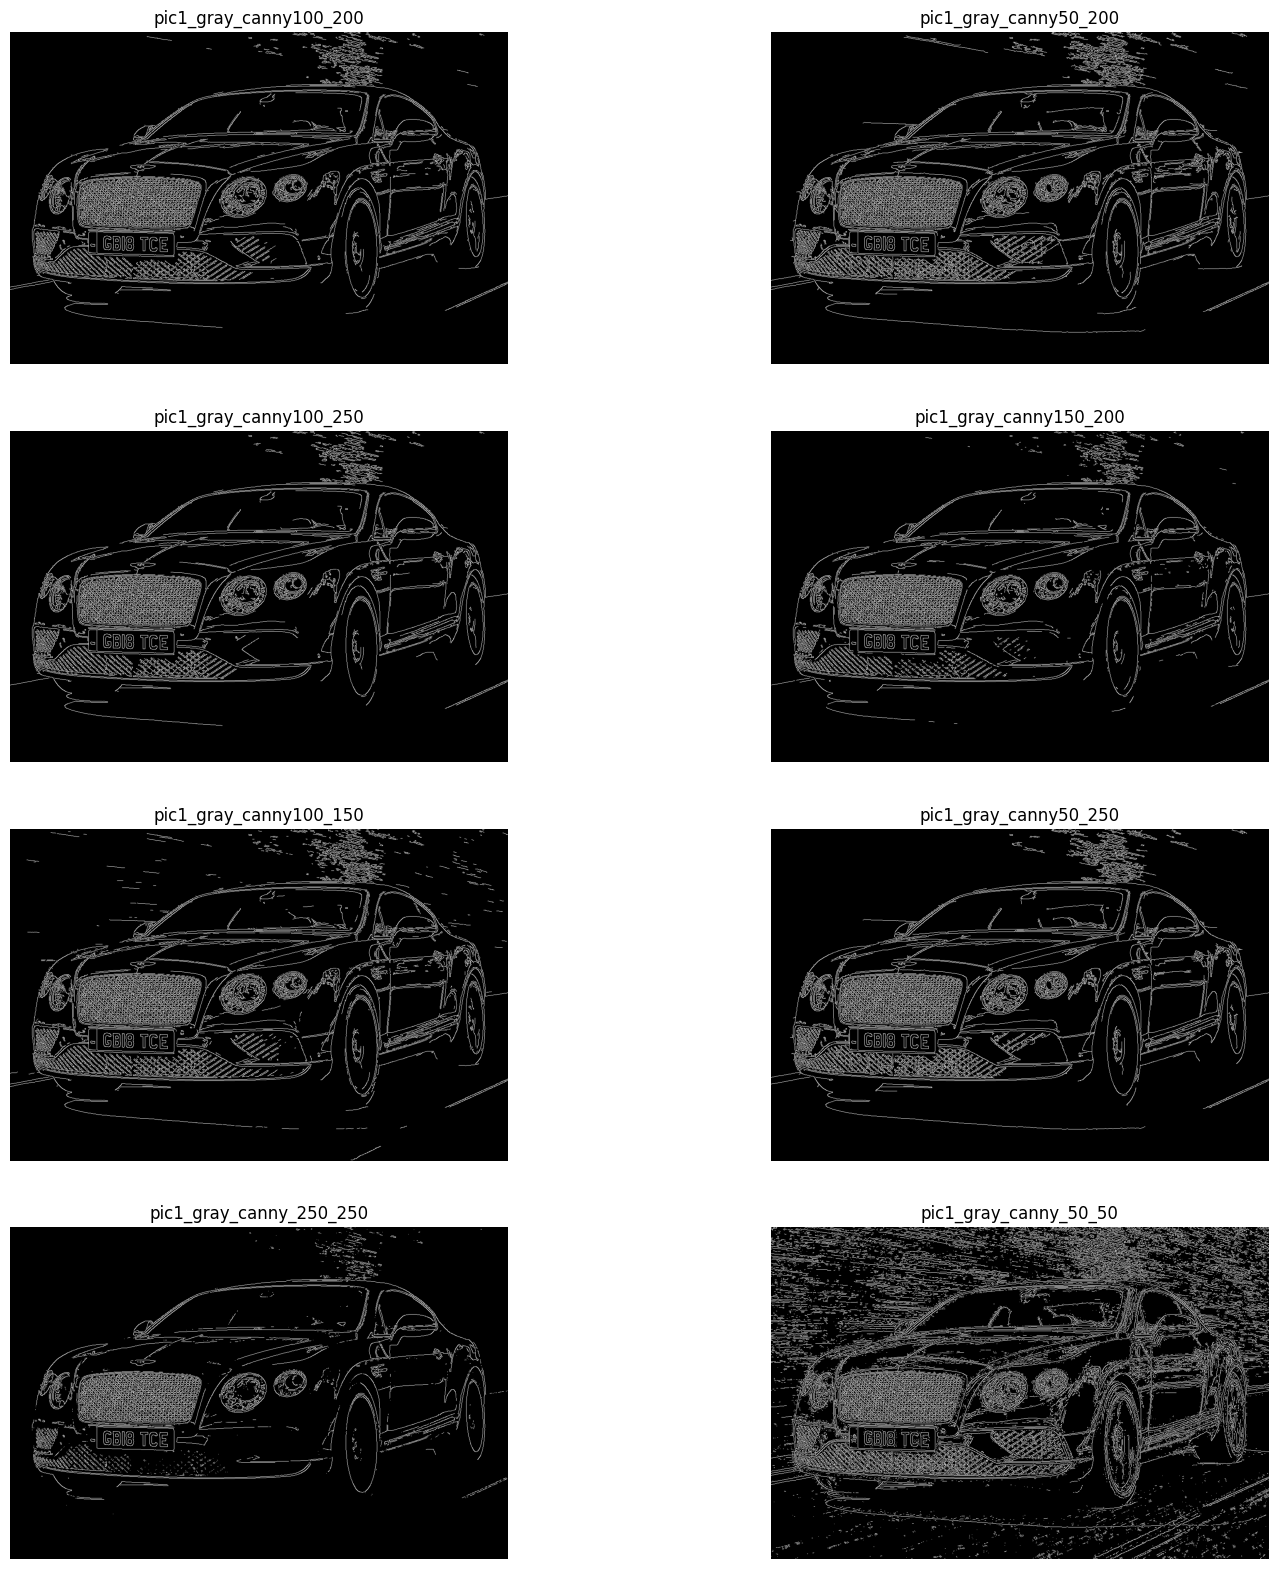

In [6]:
pic1_gray_canny_100_200 = cv2.Canny(pic1_gray, 100, 200)
pic1_gray_canny_50_200 = cv2.Canny(pic1_gray, 50, 200)
pic1_gray_canny_100_250 = cv2.Canny(pic1_gray, 100, 250)
pic1_gray_canny_150_200 = cv2.Canny(pic1_gray, 150, 200)
pic1_gray_canny_100_150 = cv2.Canny(pic1_gray, 100, 150)
pic1_gray_canny_50_250 = cv2.Canny(pic1_gray, 50, 250)
pic1_gray_canny_250_250 = cv2.Canny(pic1_gray, 250, 250)
pic1_gray_canny_50_50 = cv2.Canny(pic1_gray, 50, 50)


plt.figure(figsize=(18, 25))
plt.subplot(5, 2, 1), plt.imshow(pic1_gray_canny_100_200, cmap='gray'), plt.title('pic1_gray_canny100_200'), plt.axis('off')
plt.subplot(5, 2, 2), plt.imshow(pic1_gray_canny_50_200, cmap='gray'), plt.title('pic1_gray_canny50_200'), plt.axis('off')
plt.subplot(5, 2, 3), plt.imshow(pic1_gray_canny_100_250, cmap='gray'), plt.title('pic1_gray_canny100_250'), plt.axis('off')
plt.subplot(5, 2, 4), plt.imshow(pic1_gray_canny_150_200, cmap='gray'), plt.title('pic1_gray_canny150_200'), plt.axis('off')
plt.subplot(5, 2, 5), plt.imshow(pic1_gray_canny_100_150, cmap='gray'), plt.title('pic1_gray_canny100_150'), plt.axis('off')
plt.subplot(5, 2, 6), plt.imshow(pic1_gray_canny_50_250, cmap='gray'), plt.title('pic1_gray_canny50_250'), plt.axis('off')
plt.subplot(5, 2, 7), plt.imshow(pic1_gray_canny_250_250, cmap='gray'), plt.title('pic1_gray_canny_250_250'), plt.axis('off')
plt.subplot(5, 2, 8), plt.imshow(pic1_gray_canny_50_50, cmap='gray'), plt.title('pic1_gray_canny_50_50'), plt.axis('off')

cv2.imwrite(path + f"/pic1_gray_canny100_200.jpg", pic1_gray_canny_100_200)
cv2.imwrite(path + f"/pic1_gray_canny50_200.jpg", pic1_gray_canny_50_200)
cv2.imwrite(path + f"/pic1_gray_canny100_250.jpg", pic1_gray_canny_100_250)
cv2.imwrite(path + f"/pic1_gray_canny150_200.jpg", pic1_gray_canny_150_200)
cv2.imwrite(path + f"/pic1_gray_canny100_150.jpg", pic1_gray_canny_100_150)
cv2.imwrite(path + f"/pic1_gray_canny50_250.jpg", pic1_gray_canny_50_250)
cv2.imwrite(path + f"/pic1_gray_canny_250_250.jpg", pic1_gray_canny_250_250)
cv2.imwrite(path + f"/pic1_gray_canny_50_50.jpg", pic1_gray_canny_50_50)

در مجموع این فیلتر برای یافتن لبه بهتر عملکرده است و آن هم استفاده از ترشولد آنهم دو مرتبه میباشد. به نوعی که خطوط لبه ای که ترسیم کرده لبه هایی هستند که هر دو شرط ترشولد را ارضا میکنند، و بنابراین همگی نیز شفافیت یکسان و برابری دارند. 

البته معمولا در کرنل های سوبل و پرویت هم از ترشولد نیز استفاده میکنند اما به طور کلی کرنل کنی، به علت داشتن دو ترشولد دقیق تر عملکرد و احساس بهتری از لبه ایجاد میکند به نوعی که خطوط زننده اطراف شکل را با تنظیم پارامتر ها میتوان به حداقل رساند تا لبه های ترسیم شده واقعا لبه های تصویر باشند نه حاشیه های تصویر!

In [16]:
#Videou with ourselves
cap = cv2.VideoCapture(0)
vid = []
while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    vid.append(gray)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [17]:
#Background Image
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
background = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
cap.release()

In [38]:
def erosion(src):
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
    return cv2.erode(src, element)

def dilation(src):
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
    return cv2.dilate(src, element)

output = []
for frame in vid:
    diff = abs(frame-background)
    ret,thresh1 = cv2.threshold(diff,140,255,cv2.THRESH_BINARY)
    erosion_dst = erosion(thresh1)
    dilation_dst = dilation(erosion_dst)
    output.append(dilation_dst)



In [39]:
import time

for i, ite in enumerate(vid):
    cv2.imshow('frame',vid[i])
    cv2.imshow('frame2',output[i])
    time.sleep(1/60)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.waitKey(0)
cv2.destroyAllWindows()